In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 불러오기
data = pd.read_csv('C:/Users/admin/Desktop/질병데이터/diabetes_prediction_dataset.csv')


# 데이터 전처리 (결측치, 이상치 처리 등)

# 특성과 타겟 분리
X = data.drop('diabetes', axis=1)  # 'diabetes'가 target column인 경우
y = data['diabetes']

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<span style = "color:blue; font-size : 18pt;">[인덱스 값] 성별, 나이, 고혈압, 심장 질환, 흡연이력, 체질량 지수, 헤모글로빈A1c(평균 혈당수치), 혈당 수치, 당뇨병</span>

In [6]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [9]:
# 필요한 라이브러리 로드
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
df = pd.read_csv('C:/Users/admin/Desktop/질병데이터/diabetes_prediction_dataset.csv')

# 범주형 변수 라벨 인코딩
le_dict = {}

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le

# 특징과 타겟 분리
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 정확도 계산
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.97065


<span style = "color:red; font-size : 18pt;"> *해당 코드는 오버피팅 가능성이 존재함 모델의 일반화 성능을 확인하기 위한 교차 검증을 수행해봐야함 </span>

In [10]:
from sklearn.model_selection import cross_val_score

# 교차 검증
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

# 특성 중요도
importances = model.feature_importances_
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})
feature_importances = feature_importances.sort_values("importance", ascending=False)
print(feature_importances)

Cross-validation scores:  [0.9704375 0.9691875 0.97125   0.97025   0.970625 ]
Average cross-validation score:  0.97035
               feature  importance
6          HbA1c_level    0.380168
7  blood_glucose_level    0.333428
5                  bmi    0.121991
1                  age    0.103744
4      smoking_history    0.028206
2         hypertension    0.014374
3        heart_disease    0.011138
0               gender    0.006951


<span style = "color:red; font-size : 18pt;"> *교차 검증의 결과로 얻은 평균 정확도는 약 0.97035로, 이는 모델이 훈련 데이터에 대해 매우 잘 일반화되었음을 나타내고있다.</span>

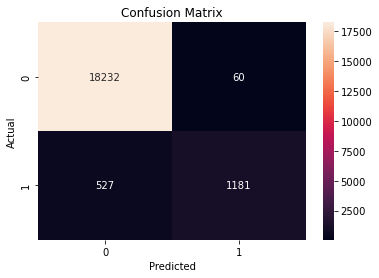

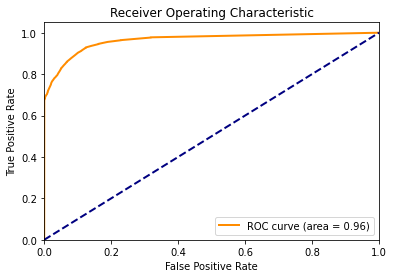

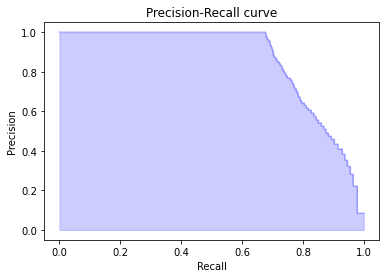

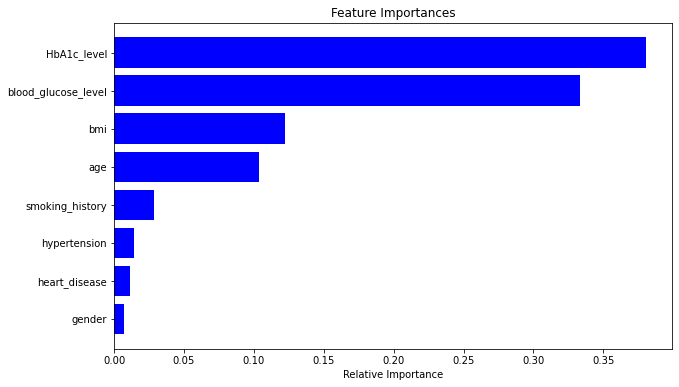

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import numpy as np


# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
# 혼동 행렬
plt.title("Confusion Matrix")
# 실제 값
plt.ylabel("Actual")
# 예측 값
plt.xlabel("Predicted")
plt.show()

# ROC 곡선
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#거짓 양성 비율
plt.xlabel('False Positive Rate')
# 참 양성 비율
plt.ylabel('True Positive Rate')
#수신자 조작 특성(ROC)
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 정밀도-재현율 곡선
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
# 재현율
plt.xlabel('Recall')
# 정밀도
plt.ylabel('Precision')
# 정밀도-재현율 곡선
plt.title('Precision-Recall curve')
plt.show()

# 특성 중요도 시각화
importances = model.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(10,6))
#특성 중요도
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
# 상대 중요도
plt.xlabel('Relative Importance')
plt.show()

<span style = "color:red; font-size : 18pt;"> 당뇨병을 예측하기 위하여 새로운 임의의 데이터를 추가한다.</span>

In [15]:
new_patient = pd.DataFrame({
    'gender': [1],  # 1: Male, 0: Female
    'age': [45],
    'hypertension': [0],  # 0: No, 1: Yes
    'heart_disease': [0],  # 0: No, 1: Yes
    'smoking_history': [1],  # 1: Previously, 2: Currently, 0: Never
    'bmi': [28],
    'HbA1c_level': [6.0],
    'blood_glucose_level': [140]
})

# 모델이 환자가 당뇨병일 확률을 예측
diabetes_proba = model.predict_proba(new_patient)[0][1]
print("당뇨병일 확률: ", diabetes_proba)

당뇨병일 확률:  0.02


In [17]:
# 새로운 환자 데이터
new_patient = pd.DataFrame({
    'gender': ['female'],
    'age': [60],
    'hypertension': [0],  # 'no'를 0으로 변환
    'heart_disease': [1],  # 'yes'를 1로 변환
    'smoking_history': ['no'],
    'bmi': [29],
    'HbA1c_level': [7],
    'blood_glucose_level': [130]
})

# 범주형 변수를 수치형으로 변환
for col in new_patient.columns:
    if new_patient[col].dtype == 'object' and col in le_dict:
        le = le_dict[col]
        new_patient[col] = new_patient[col].map(lambda s: 'unknown' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, 'unknown')
        new_patient[col] = le.transform(new_patient[col])

# 당뇨병 발병 확률 예측
diabetes_proba = model.predict_proba(new_patient)[:, 1]
print("당뇨병일 확률: ", diabetes_proba[0])


당뇨병일 확률:  0.91


<span style = "color:red; font-size : 18pt;"> 두 가지의 추가 임의데이터를 통하여 당뇨병을 예측하는 프로그램이 생성되었음.</span>